<a href="https://colab.research.google.com/github/Alexander-Resch/Colab_Notebooks/blob/main/Triangles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

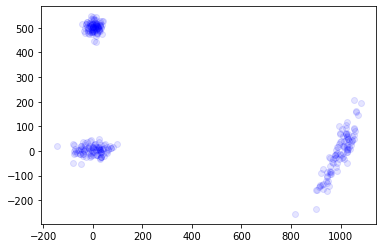

In [5]:
def add_Noise(X=[0,0],sigma=1,mu=0,sigma_alpha=0):

  X[0] = X[0]+sigma*np.random.randn()+mu
  X[1] = X[1]+sigma*np.random.randn()+mu
  rotation = sigma_alpha*np.random.randn()

  return X, rotation

def rotate_Points(Coordinates,angle_in_degrees,center_of_rotation=(0,0)):


  rotation = angle_in_degrees*np.pi/180 #convert to radian
  M = np.array([[np.cos(rotation),-np.sin(rotation)],
                [np.sin(rotation),np.cos(rotation)]])
  
  Rotated_Coordinates = []
  
  for point in Coordinates:
    point=list(point)
    #print('initial point: ', point)
    
    point[0] = point[0]-center_of_rotation[0]
    point[1] = point[1]-center_of_rotation[1]
    #print('shifted point: ', point)

    p = np.array([[point[0]],
                  [point[1]]])
    #print(M.shape,p.shape)
    p_new = np.ravel(M.dot(p))
    #print('rotated point: ', p_new)

    p_new[0] = p_new[0]+center_of_rotation[0]
    p_new[1] = p_new[1]+center_of_rotation[1]
    #print('shifted bacl point: ', p_new)

    Rotated_Coordinates.append((p_new[0],p_new[1]))
  
  return Rotated_Coordinates

for i in range(100):

  'DEFINE COORDINATES [mm]'
  tx, ty = 0, 500
  T = [tx, ty]
  T, angle_in_degrees = add_Noise(T,sigma=20,sigma_alpha=5)
  
  xBT, yBT = 0, -500
  bx, by = 0, 0
  B = [bx, by]  
  B[0], B[1] = T[0]+xBT,T[1]+yBT

  xWT, yWT = 1000, -500
  wx, wy = 1000, 0
  W = [wx,wy]
  W[0], W[1] = T[0]+xWT,T[1]+yWT



  tri = [T,B,W]
  rotated_triangle = rotate_Points(tri,angle_in_degrees=angle_in_degrees,center_of_rotation=T)

#plot simulated
  for p in rotated_triangle:
    plt.scatter(p[0],p[1],alpha = 0.1, color = 'blue')


NameError: ignored

array([3, 4])